In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
df =pd.read_csv('1.csv')
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,0,1,0,1,0,0,0,1,0,1,...,m,White-European,no,yes,Brazil,no,5,'18 and more',Self,YES
2,0,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,10,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',Parent,NO


### Exploratory Data Analysis

In [167]:
df.shape

(704, 21)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         704 non-null    int64 
 1   A2_Score         704 non-null    int64 
 2   A3_Score         704 non-null    int64 
 3   A4_Score         704 non-null    int64 
 4   A5_Score         704 non-null    int64 
 5   A6_Score         704 non-null    int64 
 6   A7_Score         704 non-null    int64 
 7   A8_Score         704 non-null    int64 
 8   A9_Score         704 non-null    int64 
 9   A10_Score        704 non-null    int64 
 10  age              704 non-null    int64 
 11  gender           704 non-null    object
 12  ethnicity        704 non-null    object
 13  jundice          704 non-null    object
 14  austim           704 non-null    object
 15  contry_of_res    704 non-null    object
 16  used_app_before  704 non-null    object
 17  result           704 non-null    in

In [169]:
df['Class/ASD'].value_counts()

Class/ASD
NO     456
YES    248
Name: count, dtype: int64

In [170]:
df['ethnicity'].value_counts()

ethnicity
White-European       240
Asian                122
'Middle Eastern '     90
?                     86
Black                 48
'South Asian'         34
Others                26
Latino                23
Pasifika              15
Hispanic              13
Turkish                6
others                 1
Name: count, dtype: int64

In [171]:
# '?' denotes undisclosed values so we move it to 'others'
df = df.replace({'?':'Others', 'others':'Others'})
df['ethnicity'].value_counts()

ethnicity
White-European       240
Asian                122
Others               113
'Middle Eastern '     90
Black                 48
'South Asian'         34
Latino                23
Pasifika              15
Hispanic              13
Turkish                6
Name: count, dtype: int64

In [172]:
df['contry_of_res'].value_counts()

contry_of_res
'United States'           114
'United Arab Emirates'     82
'New Zealand'              78
India                      77
'United Kingdom'           76
                         ... 
China                       1
Chile                       1
Lebanon                     1
Burundi                     1
Cyprus                      1
Name: count, Length: 67, dtype: int64

In [173]:
#Merging countries which are occurring less then 6 times into 'Other' category.
occ = df['contry_of_res'].value_counts()
li_country = []
for i in occ.index:
    if occ[i] < 6:
        li_country.append(i)
print(li_country)

['Ireland', 'Malaysia', "'Viet Nam'", 'Germany', 'Austria', 'Italy', 'Philippines', "'Saudi Arabia'", 'Kazakhstan', 'Belgium', 'Romania', 'Spain', 'Bangladesh', 'Pakistan', 'Egypt', 'Sweden', 'AmericanSamoa', 'Ethiopia', "'South Africa'", 'Ukraine', 'Argentina', 'Bahamas', 'Armenia', 'Iceland', 'Aruba', 'Niger', 'Bolivia', "'Czech Republic'", 'Finland', 'Indonesia', 'Turkey', 'Iraq', 'Azerbaijan', 'Angola', 'Nepal', 'Ecuador', "'Sierra Leone'", 'Portugal', 'Serbia', 'Uruguay', 'Japan', "'Hong Kong'", 'Nicaragua', "'Costa Rica'", 'Oman', 'Tonga', 'China', 'Chile', 'Lebanon', 'Burundi', 'Cyprus']


In [174]:
df.replace(li_country, 'Others', inplace= True)

In [175]:
df['contry_of_res'].value_counts()

contry_of_res
'United States'           114
Others                    101
'United Arab Emirates'     82
'New Zealand'              78
India                      77
'United Kingdom'           76
Jordan                     42
Australia                  40
Canada                     15
'Sri Lanka'                14
Afghanistan                13
France                     11
Netherlands                10
Brazil                      9
Mexico                      8
Iran                        7
Russia                      7
Name: count, dtype: int64

In [176]:
df['gender'].value_counts()

gender
m    361
f    343
Name: count, dtype: int64

In [177]:
df['relation'].value_counts()

relation
Self                          519
Others                         98
Parent                         55
Relative                       28
'Health care professional'      4
Name: count, dtype: int64

In [178]:
# '?' denotes undisclosed values so we move it to 'others'
df = df.replace({'?':'Others', 'others':'Others'})
df['relation'].value_counts()

relation
Self                          519
Others                         98
Parent                         55
Relative                       28
'Health care professional'      4
Name: count, dtype: int64

In [179]:
# 'age_desc' column has only one value - ['18 and more']
df.drop(['age_desc'], axis=1, inplace= True)
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,54,f,White-European,no,no,'United States',no,6,Self,NO
1,0,1,0,1,0,0,0,1,0,1,24,m,White-European,no,yes,Brazil,no,5,Self,YES
2,0,1,0,1,1,0,1,1,1,1,41,m,Latino,yes,yes,Others,no,10,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,'United States',no,6,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,Others,no,no,Others,no,2,Parent,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25,f,White-European,no,no,Russia,no,7,Self,YES
700,1,0,0,0,0,0,0,1,0,1,34,m,Hispanic,no,no,Mexico,no,3,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,24,f,Others,no,no,Russia,no,7,Others,YES
702,1,0,0,1,1,0,1,0,1,1,35,m,'South Asian',no,no,Others,no,6,Self,NO


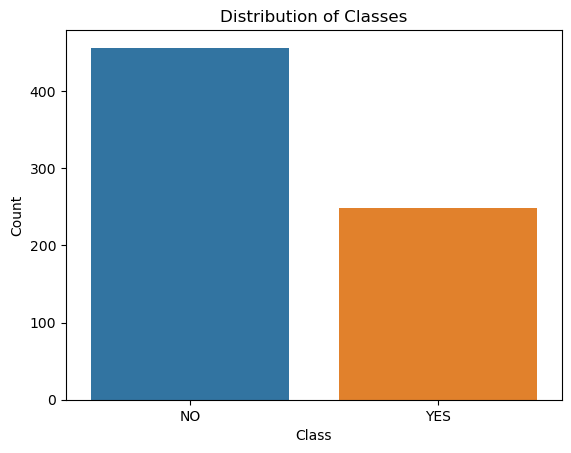

In [180]:
df['Class/ASD'] = df['Class/ASD'].astype(str)
sns.countplot(data=df, x='Class/ASD')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.show()

In [181]:
df.describe(include=object)

,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,relation,Class/ASD
count,704,704,704,704,704,704,704,704
unique,2,10,2,2,17,2,5,2
top,m,White-European,no,no,'United States',no,Self,NO
freq,361,240,620,593,114,692,519,456


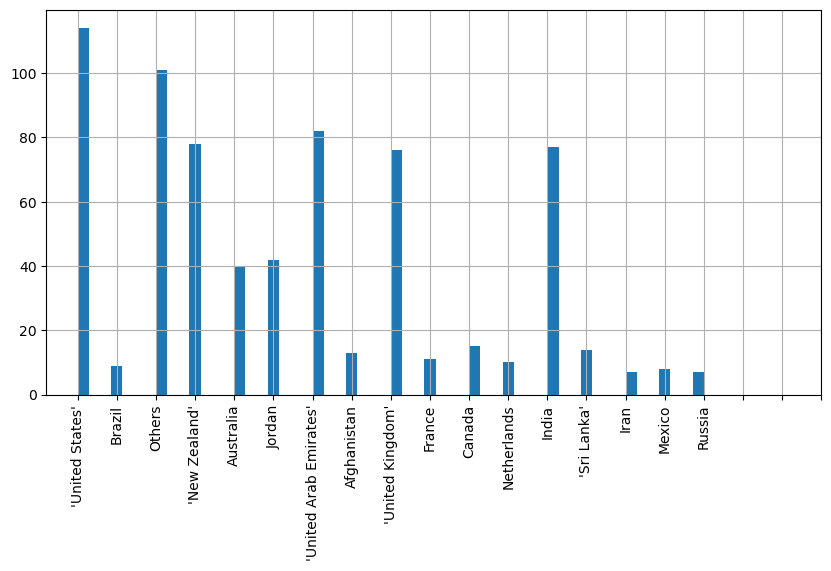

In [182]:
plt.figure(figsize=(10,5))
df['contry_of_res'].hist(linewidth=0.2,bins=56)
plt.xticks(range(0,20),rotation=90)
plt.show()

In [183]:
# Initialize counters
int_columns = []
float_columns = []
object_columns = []

# Iterate through the columns
for column in df.columns:
    if df[column].dtype == 'int64':
        int_columns.append(column)
    elif df[column].dtype == 'float64':
        float_columns.append(column)
    elif df[column].dtype == 'object':
        object_columns.append(column)

print("Integer columns:", int_columns)
print("Float columns:", float_columns)
print("Object columns:", object_columns)


Integer columns: ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result']
Float columns: []
Object columns: ['gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'relation', 'Class/ASD']


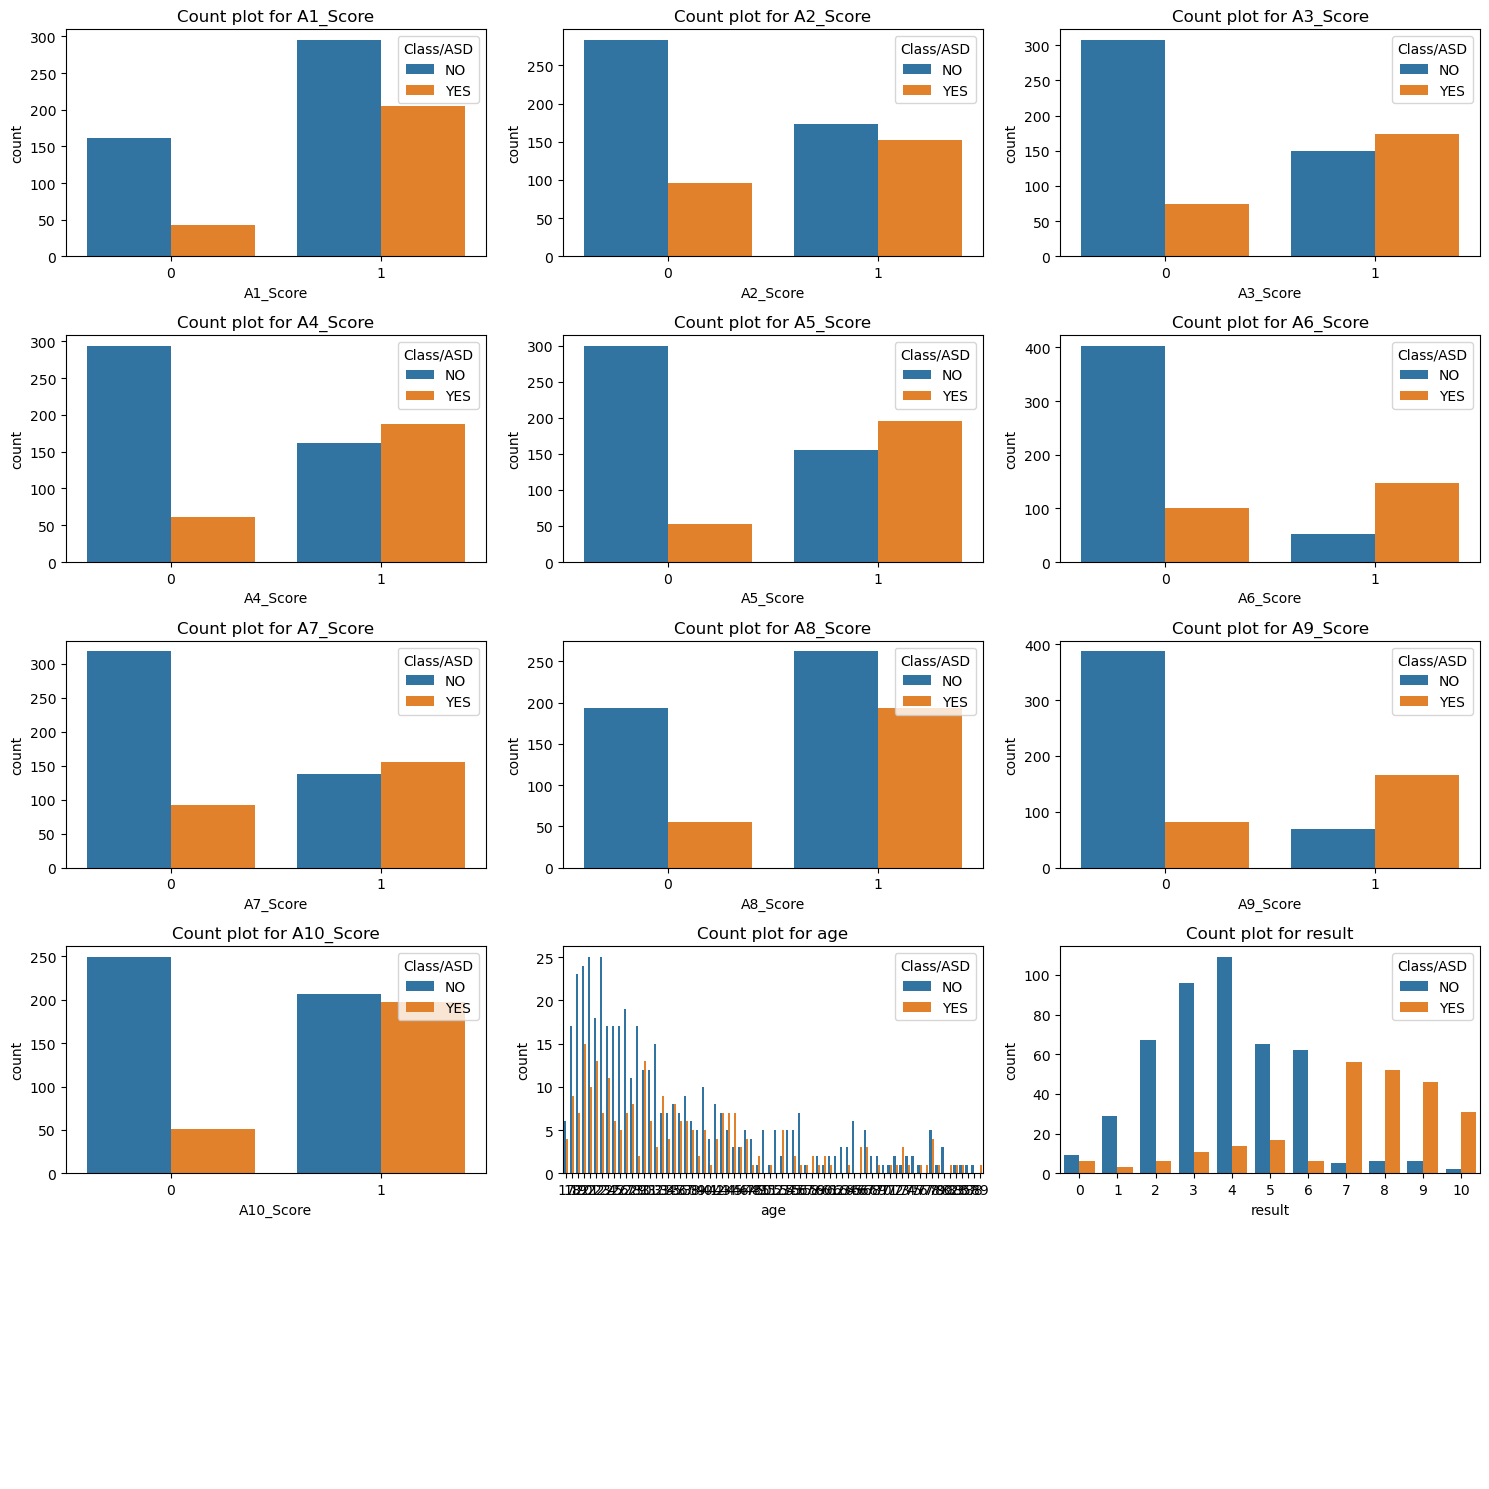

In [184]:
# Calculate the number of rows and columns for the subplot grid
num_rows = len(int_columns) // 3 + 1
num_cols = 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array if it's multidimensional
axes = axes.flatten()

for i, col in enumerate(int_columns):
    if i < len(int_columns):
        ax = axes[i]
        sns.countplot(data=df, x=col, hue='Class/ASD', ax=ax)
        ax.set_title(f'Count plot for {col}')
        ax.legend(title='Class/ASD')

# Hide any unused subplots
for i in range(len(int_columns), num_rows * num_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


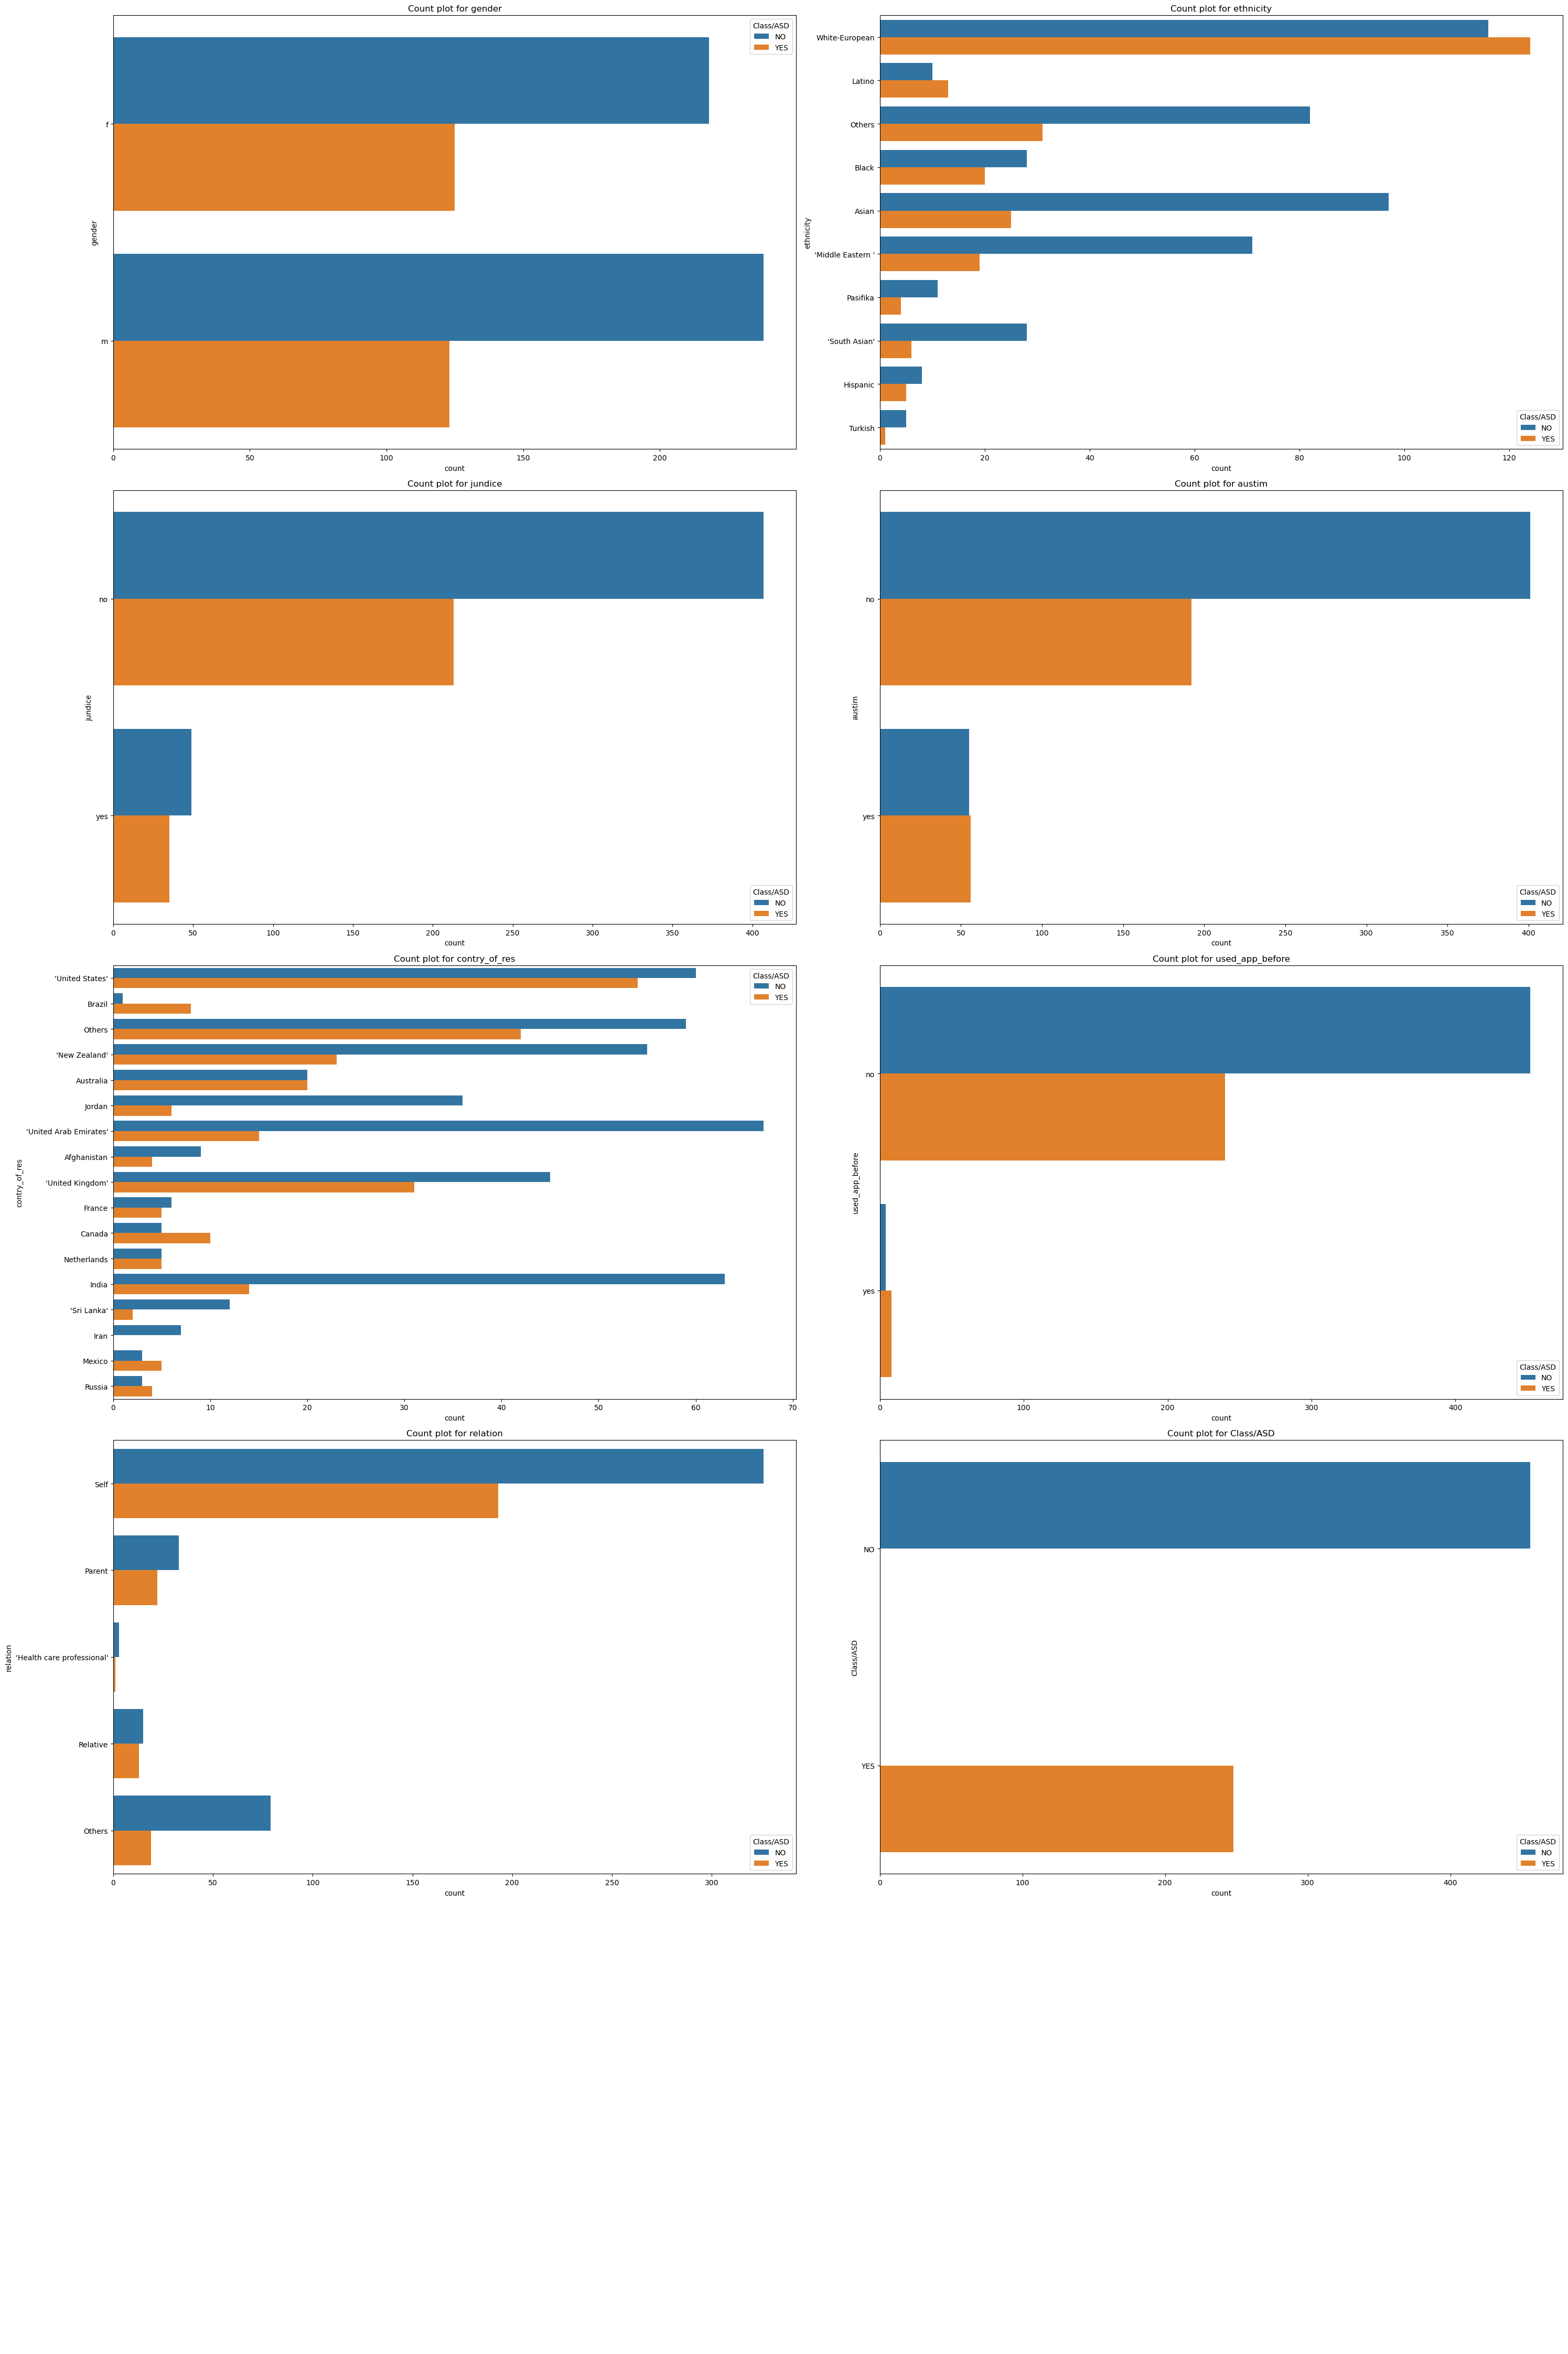

In [185]:
# Calculate the number of rows and columns for the subplot grid
num_rows = len(object_columns) // 2 + 1
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 45))

# Flatten the axes array if it's multidimensional
axes = axes.flatten()

for i, col in enumerate(object_columns):
    if i < len(object_columns):
        ax = axes[i]
        sns.countplot(data=df, y=col, hue='Class/ASD', ax=ax)
        ax.set_title(f'Count plot for {col}')
        ax.legend(title='Class/ASD')

# Hide any unused subplots
for i in range(len(object_columns), num_rows * num_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


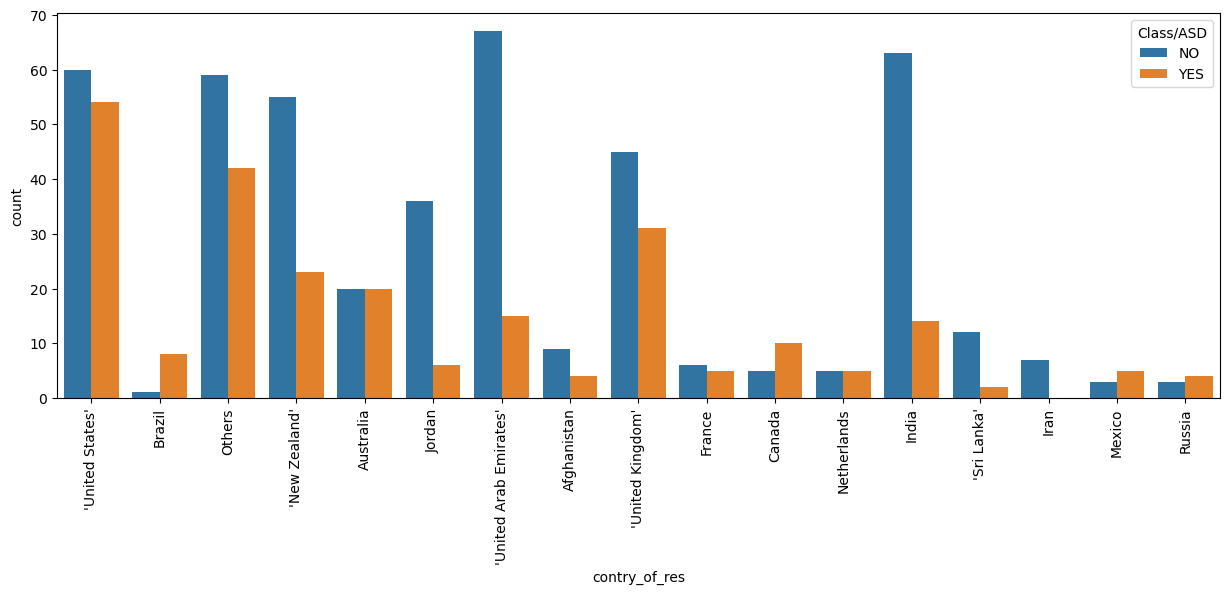

In [186]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='contry_of_res', hue='Class/ASD')
plt.xticks(rotation=90)
plt.show()

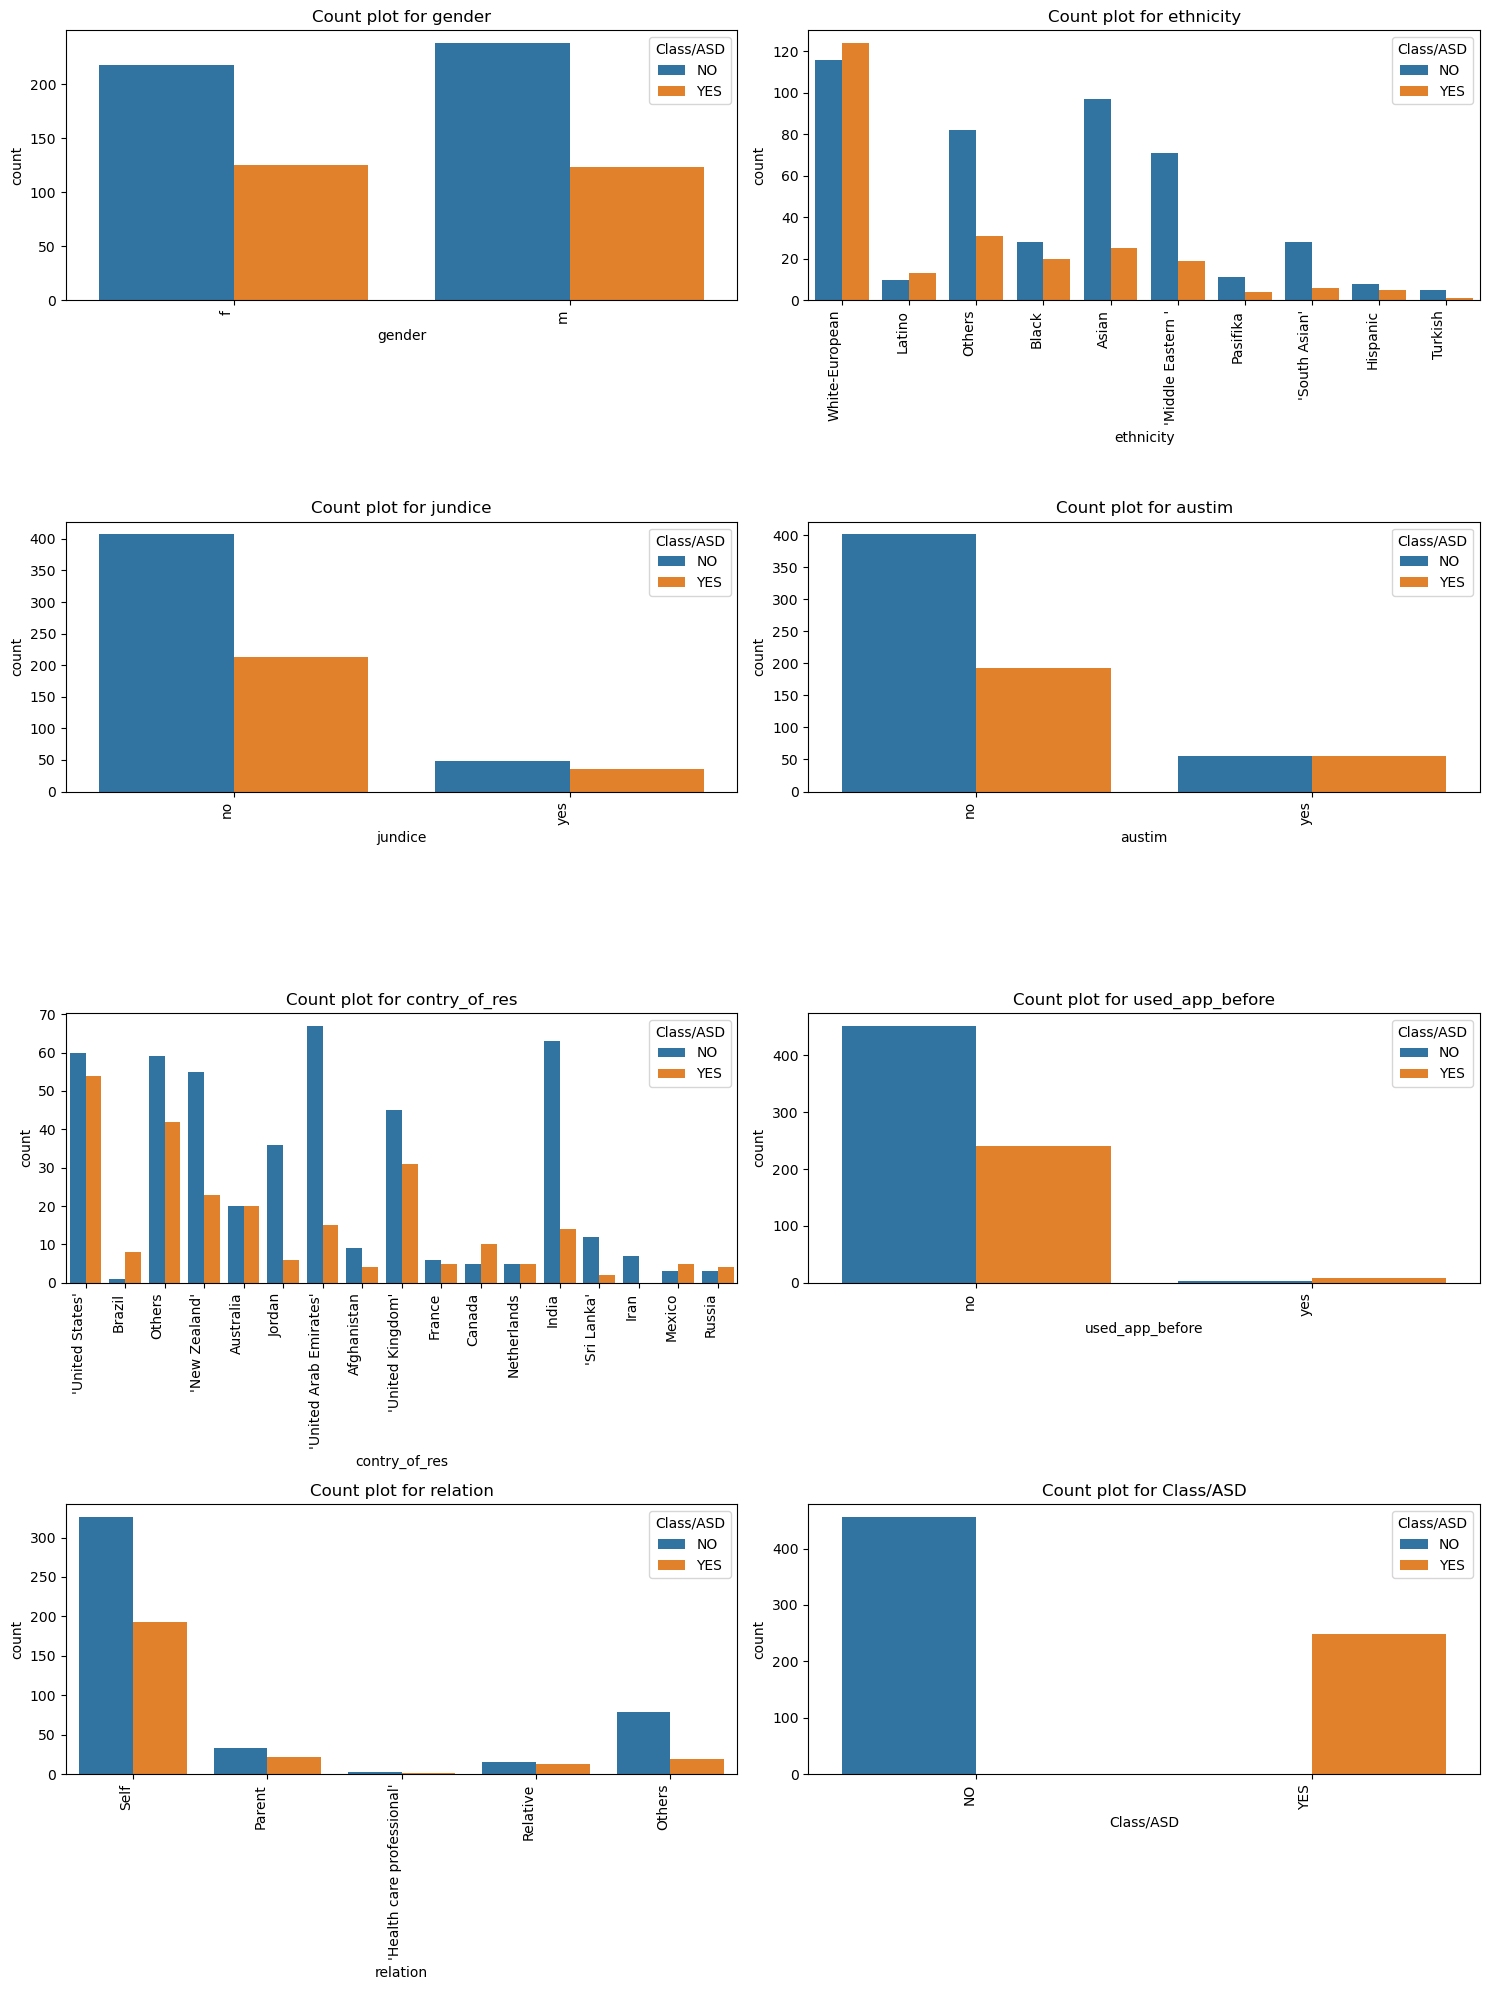

In [187]:
# Calculate the number of rows and columns for the subplot grid
num_rows = len(object_columns) // 2 + len(object_columns) % 2  # Add 1 for the last row if there's an odd number of plots
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, col in enumerate(object_columns):
    row = i // num_cols
    col_idx = i % num_cols
    ax = axes[row, col_idx]
    sns.countplot(data=df, x=col, hue='Class/ASD', ax=ax)
    ax.set_title(f'Count plot for {col}')
    ax.legend(title='Class/ASD')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')  # Rotate x-axis labels

# Hide any unused subplots
for i in range(len(object_columns), num_rows * num_cols):
    row = i // num_cols
    col_idx = i % num_cols
    axes[row, col_idx].axis('off')

plt.tight_layout()
plt.show()


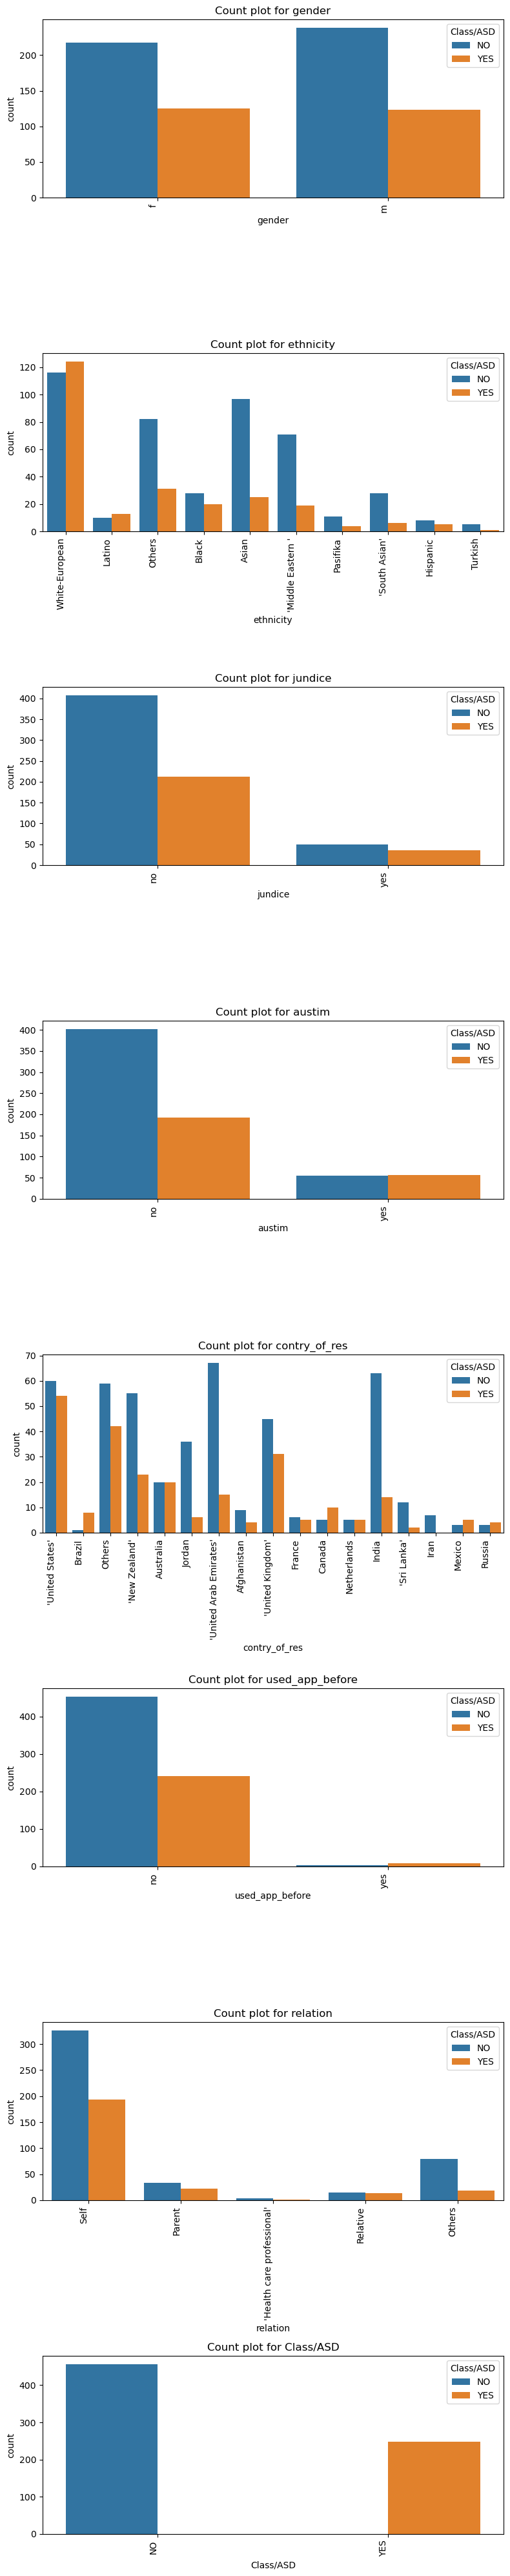

In [188]:
# Calculate the number of rows for the subplot grid
num_rows = len(object_columns)

# Create subplots
fig, axes = plt.subplots(num_rows, 1, figsize=(8, 5 * num_rows))

for i, col in enumerate(object_columns):
    sns.countplot(data=df, x=col, hue='Class/ASD', ax=axes[i])
    axes[i].set_title(f'Count plot for {col}')
    axes[i].legend(title='Class/ASD')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, ha='right')  # Rotate x-axis labels

plt.tight_layout()
plt.show()


C:\Users\pujan\AppData\Local\Temp\ipykernel_8940\2799180019.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


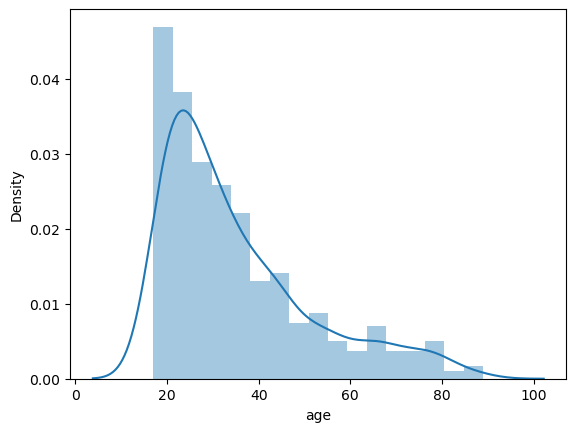

In [189]:
sns.distplot(df['age'])
plt.show()

In [190]:
df['Class/ASD'] = df['Class/ASD'].replace({'YES': 1, 'NO': 0})

In [191]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [192]:
X = df.drop('Class/ASD', axis=1)
y = df['Class/ASD']

In [193]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         704 non-null    int64 
 1   A2_Score         704 non-null    int64 
 2   A3_Score         704 non-null    int64 
 3   A4_Score         704 non-null    int64 
 4   A5_Score         704 non-null    int64 
 5   A6_Score         704 non-null    int64 
 6   A7_Score         704 non-null    int64 
 7   A8_Score         704 non-null    int64 
 8   A9_Score         704 non-null    int64 
 9   A10_Score        704 non-null    int64 
 10  age              704 non-null    int64 
 11  gender           704 non-null    object
 12  ethnicity        704 non-null    object
 13  jundice          704 non-null    object
 14  austim           704 non-null    object
 15  contry_of_res    704 non-null    object
 16  used_app_before  704 non-null    object
 17  result           704 non-null    in

In [194]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 704 entries, 0 to 703
Series name: Class/ASD
Non-Null Count  Dtype
--------------  -----
704 non-null    int64
dtypes: int64(1)
memory usage: 5.6 KB


In [195]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 704 entries, 0 to 703
Series name: Class/ASD
Non-Null Count  Dtype
--------------  -----
704 non-null    int64
dtypes: int64(1)
memory usage: 5.6 KB


In [196]:
#Creating two dataframes - String dataframe , Numeric dataframe
X_category = X.select_dtypes(include='object')
X_numeric = X.select_dtypes(exclude='object')

In [197]:
X_category.head()

,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,relation
0,f,White-European,no,no,'United States',no,Self
1,m,White-European,no,yes,Brazil,no,Self
2,m,Latino,yes,yes,Others,no,Parent
3,f,White-European,no,yes,'United States',no,Self
4,f,Others,no,no,Others,no,Parent


In [198]:
X_numeric.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
0,1,1,1,1,0,0,1,1,0,0,54,6
1,0,1,0,1,0,0,0,1,0,1,24,5
2,0,1,0,1,1,0,1,1,1,1,41,10
3,1,1,0,1,0,0,1,1,0,1,35,6
4,1,0,0,0,0,0,0,1,0,0,40,2


### Handling Categorical columns

In [199]:
from sklearn.preprocessing import OneHotEncoder

In [200]:
enc = OneHotEncoder(handle_unknown = 'ignore')
X_category_enc = enc.fit_transform(X_category)

In [201]:
X_category_enc.shape

(704, 40)

In [202]:
df_X_category = pd.DataFrame(X_category_enc.toarray())

In [203]:
df_X_category.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


### Scaling Numeric Continuous columns

In [204]:
from sklearn.preprocessing import MinMaxScaler

In [205]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X_numeric[['age','result']])

In [206]:
df_X_scaled = pd.DataFrame(X_scaled, columns=['age','result'])

In [207]:
df_X_scaled.head()

,age,result
0,0.513889,0.6
1,0.097222,0.5
2,0.333333,1.0
3,0.250000,0.6
4,0.319444,0.2


#### Merging dataframes together

In [208]:
X_numeric.drop(['age','result'], axis=1, inplace= True)

In [209]:
df_X_numeric = pd.concat([X_numeric,df_X_scaled], axis=1)

In [210]:
df_X_numeric.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
0,1,1,1,1,0,0,1,1,0,0,0.513889,0.6
1,0,1,0,1,0,0,0,1,0,1,0.097222,0.5
2,0,1,0,1,1,0,1,1,1,1,0.333333,1.0
3,1,1,0,1,0,0,1,1,0,1,0.250000,0.6
4,1,0,0,0,0,0,0,1,0,0,0.319444,0.2


In [211]:
df_X_final = pd.concat([df_X_numeric,df_X_category], axis=1)

In [212]:
df_X_final.shape

(704, 52)

#### Spliting Dataset into Train and validation split

In [213]:
from sklearn.model_selection import train_test_split

In [214]:
X_train, X_test, y_train, y_test = train_test_split(df_X_final, y, test_size=0.2, stratify=df['Class/ASD'], random_state=2)

In [215]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((563, 52), (563,), (141, 52), (141,))

#### Model Training

In [216]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.linear_model import LogisticRegressionCV

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

##### Logistic Regression

In [217]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [218]:
lg = LogisticRegression(solver='newton-cg', max_iter=300, penalty='l2',C=0.1, l1_ratio= None, random_state=32)
lg.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=300, random_state=32, solver='newton-cg')

In [219]:
pred = lg.predict(X_test)

In [220]:
lg.score(X_train, y_train)

0.8898756660746003

In [221]:
print('Accuracy: ', accuracy_score(y_test, pred) )
print('F1-score: ', f1_score(y_test, pred))
print('Confusion Matrix:\n ', confusion_matrix(y_test, pred))

Accuracy:  0.8581560283687943
F1-score:  0.782608695652174
Confusion Matrix:
  [[85  6]
 [14 36]]


##### ROC Curve

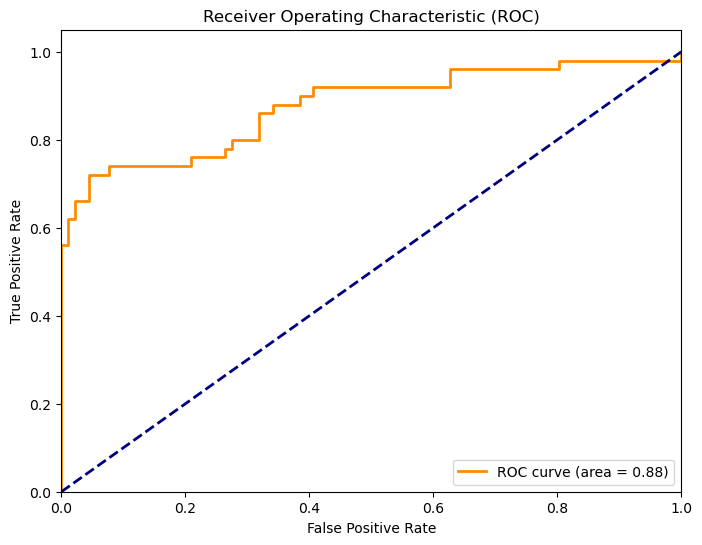

In [222]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Assuming you have already fitted the LogisticRegression model (lg) and preprocessed X_test

# Predict class probabilities
probs = lg.predict_proba(X_test)

# Get the probability estimates for the positive class (class 1)
positive_probs = probs[:, 1]

# Calculate ROC metrics
fpr, tpr, thresholds = roc_curve(y_test, positive_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

##### Decision Tree

In [223]:
dt = DecisionTreeClassifier(criterion='gini', splitter='best',ccp_alpha= 0.01,random_state=42)
pred = dt.fit(X_train, y_train)

In [224]:
pred = dt.predict(X_test)
dt.score(X_train, y_train)

0.8880994671403197

In [225]:
print('Accuracy: ', accuracy_score(y_test, pred) )
print('F1-score: ', f1_score(y_test, pred))
print('Confusion Matrix:\n ', confusion_matrix(y_test, pred))

Accuracy:  0.8652482269503546
F1-score:  0.7912087912087912
Confusion Matrix:
  [[86  5]
 [14 36]]


[Text(0.5, 0.75, 'x[11] <= 0.65\ngini = 0.456\nsamples = 563\nvalue = [365, 198]'),
 Text(0.25, 0.25, 'gini = 0.215\nsamples = 400\nvalue = [351, 49]'),
 Text(0.75, 0.25, 'gini = 0.157\nsamples = 163\nvalue = [14, 149]')]

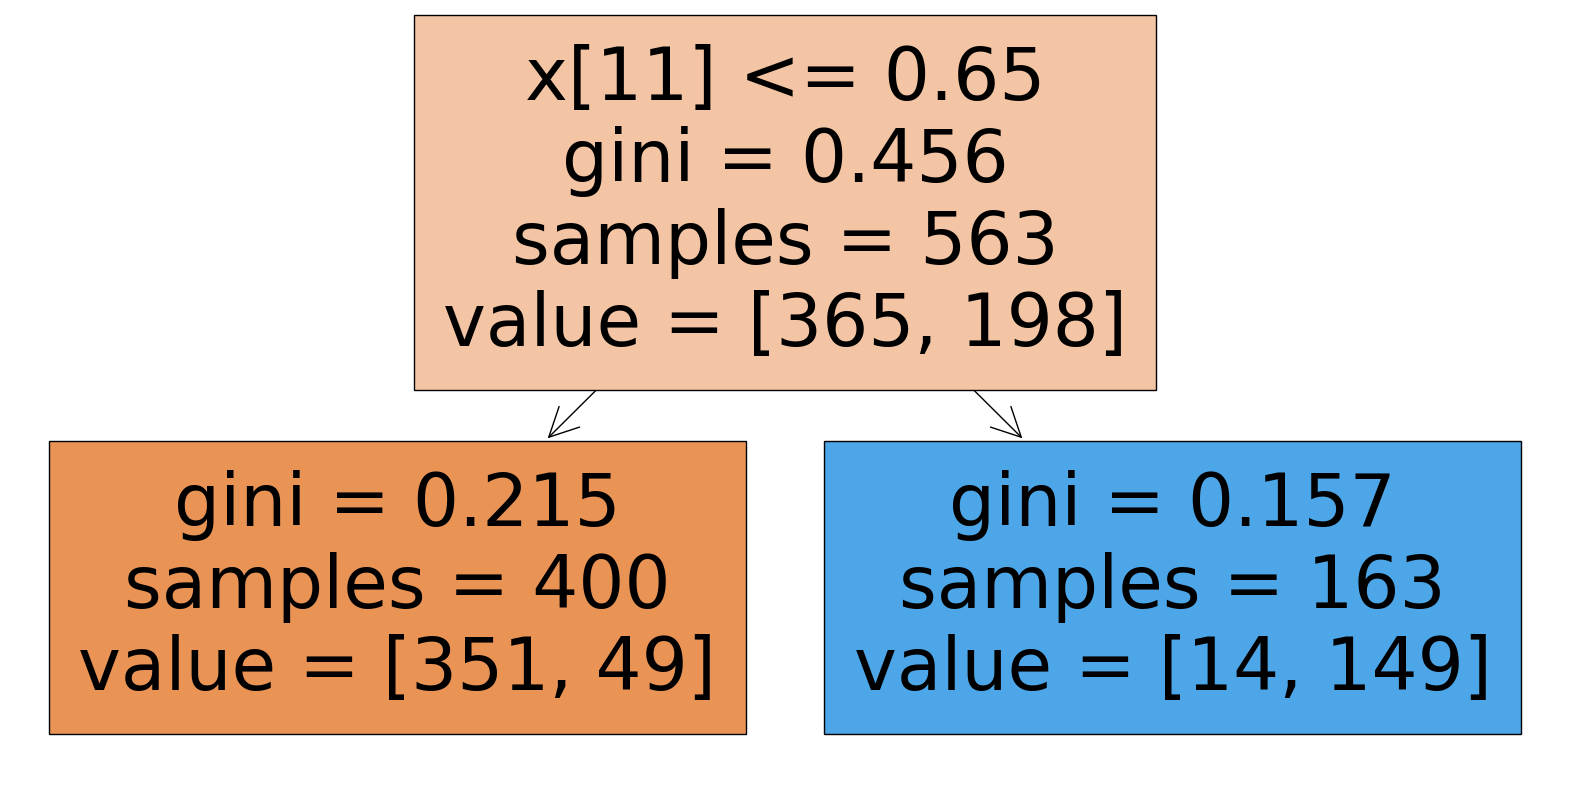

In [226]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt, filled=True)

In [227]:
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas , path.impurities

In [228]:
ccp_alphas

array([0.        , 0.0008881 , 0.00111012, 0.00117375, 0.00137875,
       0.00148017, 0.00152246, 0.00157436, 0.00159858, 0.00159858,
       0.00162676, 0.00164933, 0.00168739, 0.00169162, 0.0016951 ,
       0.00176152, 0.0017762 , 0.00217988, 0.00221342, 0.00236827,
       0.00242992, 0.00254589, 0.0026643 , 0.0026643 , 0.00281421,
       0.00281822, 0.00304491, 0.00346528, 0.0042908 , 0.0053286 ,
       0.00565163, 0.00903251, 0.25780054])

In [229]:
dts = []

for ccp in ccp_alphas:
    dt = DecisionTreeClassifier(ccp_alpha= ccp,random_state=42)
    dt.fit(X_train, y_train)
    dts.append(dt)
print(f'Number of nodes in last tree is: {dts[-1].tree_.node_count} with ccp_alpha: {ccp_alphas[-1]}')

Number of nodes in last tree is: 1 with ccp_alpha: 0.25780053629908306


##### Accuracy Vs Alphas for training and valdiation sets

In [230]:
#CCP alpha= Cost Complexity Pruning ->> to handle overfitting

In [231]:
train_scores = [dt.score(X_train, y_train) for dt in dts]
test_scores = [dt.score(X_test, y_test) for dt in dts]

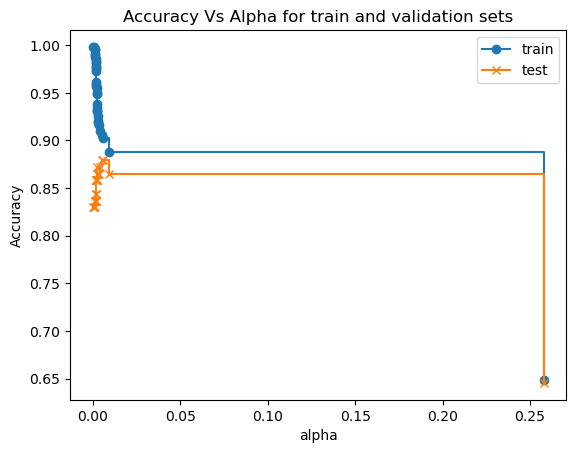

In [232]:
fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Vs Alpha for train and validation sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='x', label='test',  drawstyle='steps-post')
ax.legend()
plt.show()

In [233]:
dt = DecisionTreeClassifier(ccp_alpha= 0.005,random_state=42)
dt.fit(X_train, y_train)
print('Training Accuracy: ',dt.score(X_train, y_train))
print('Validation Accuracy: ', dt.score(X_test, y_test))

pred = dt.predict(X_test)
print('f1 Score: ', f1_score(pred, y_test))
print('Confusion Matrix:\n ', confusion_matrix(pred, y_test))
cm = confusion_matrix(pred, y_test)

Training Accuracy:  0.9094138543516874
Validation Accuracy:  0.8723404255319149
f1 Score:  0.7954545454545453
Confusion Matrix:
  [[88 15]
 [ 3 35]]


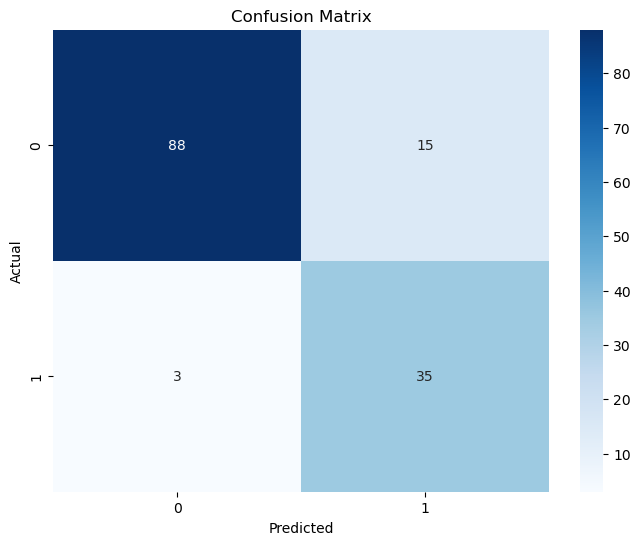

In [234]:
# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##### Random Forest

In [235]:
rf = RandomForestClassifier(n_estimators=50, class_weight='balanced',ccp_alpha=0.05, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(ccp_alpha=0.05, class_weight='balanced', n_estimators=50,
                       random_state=42)

In [236]:
pred = rf.predict(X_test)

In [237]:
rf.score(X_train, y_train)

0.8952042628774423

In [238]:
print('Accuracy: ', accuracy_score(y_test, pred) )
print('F1-score: ', f1_score(y_test, pred))
print('Confusion Matrix:\n ', confusion_matrix(y_test, pred))
cm = confusion_matrix(y_test, pred)

Accuracy:  0.8865248226950354
F1-score:  0.8222222222222222
Confusion Matrix:
  [[88  3]
 [13 37]]


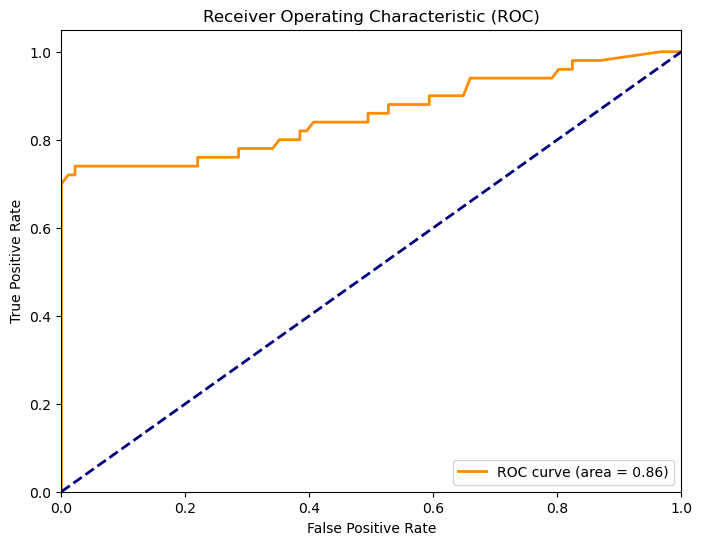

In [259]:
# Predict probabilities instead of labels
probas = rf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

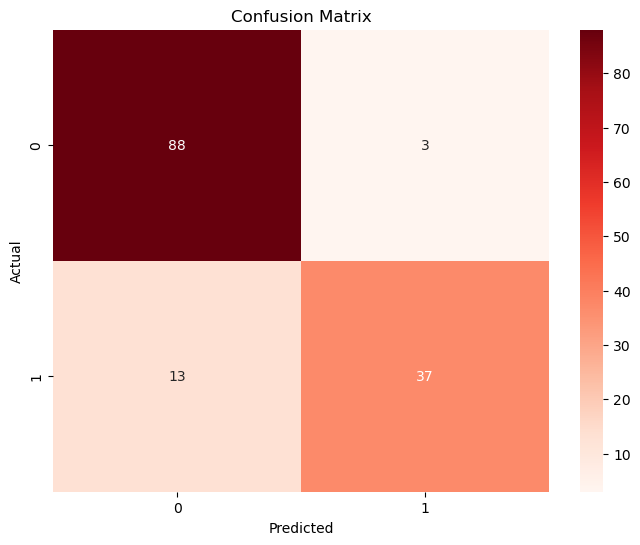

In [239]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##### SVC

In [240]:
svc = SVC(kernel='rbf', C=0.45, gamma=0.07)
#svc = SVC(kernel='poly', degree=4, C=0.65, gamma=0.065)
svc.fit(X_train, y_train)
svc.score(X_train, y_train)

0.9040852575488455

In [241]:
pred = svc.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, pred) )
print('F1-score: ', f1_score(y_test, pred))
print('Confusion Matrix:\n ', confusion_matrix(y_test, pred))

Accuracy:  0.851063829787234
F1-score:  0.7586206896551725
Confusion Matrix:
  [[87  4]
 [17 33]]


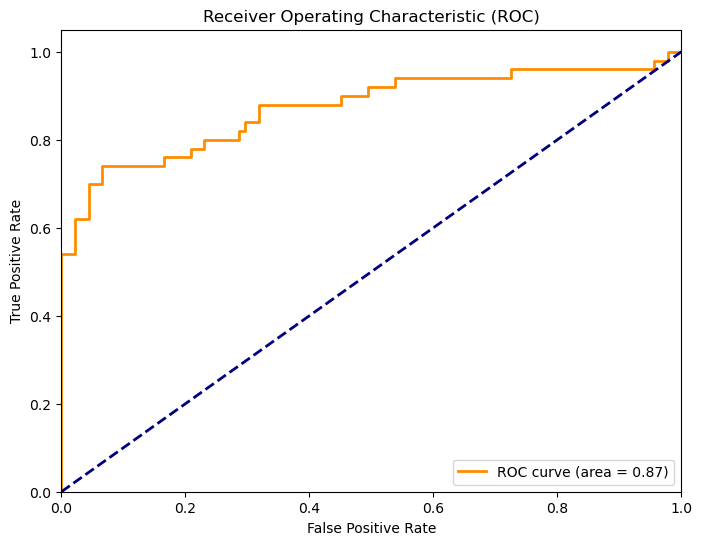

In [262]:
# ROC curve
probas = svc.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, probas)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")


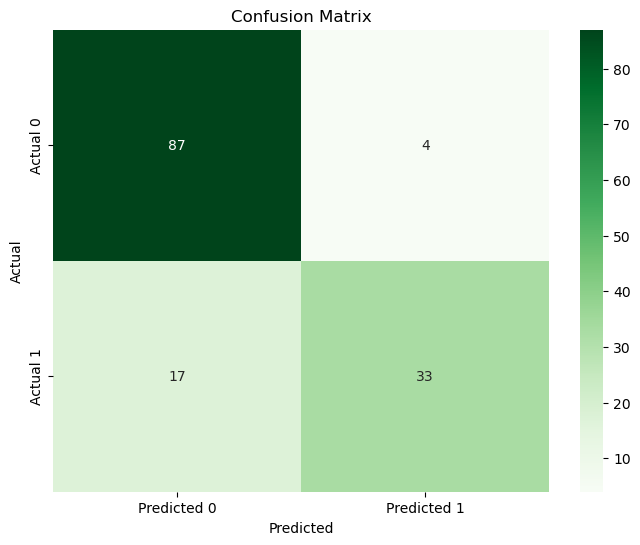

In [265]:
# Heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

##### Extra Trees

In [242]:
ext = ExtraTreesClassifier(max_depth=5,min_samples_split=2 ,min_samples_leaf=5, random_state= 42, criterion='entropy')
ext.fit(X_train, y_train)
ext.score(X_train, y_train)

0.8969804618117229

In [243]:
pred = ext.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, pred) )
print('F1-score: ', f1_score(y_test, pred))
print('Confusion Matrix:\n ', confusion_matrix(y_test, pred))

Accuracy:  0.851063829787234
F1-score:  0.7586206896551725
Confusion Matrix:
  [[87  4]
 [17 33]]


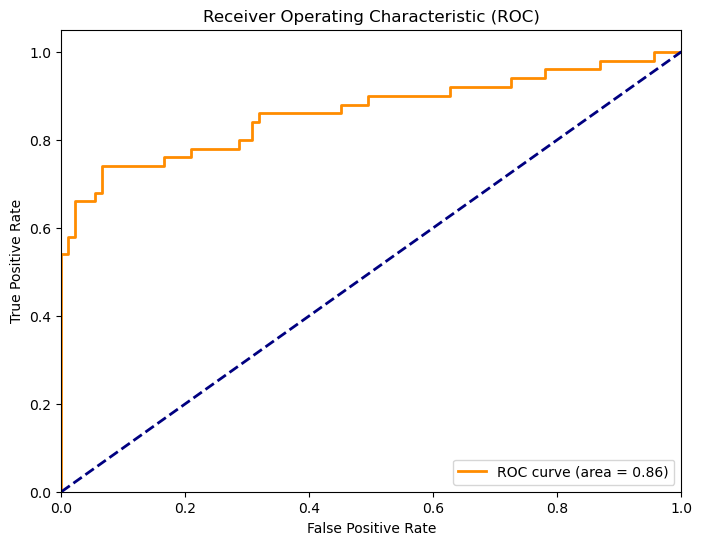

In [260]:
# ROC curve
probas = ext.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, probas[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

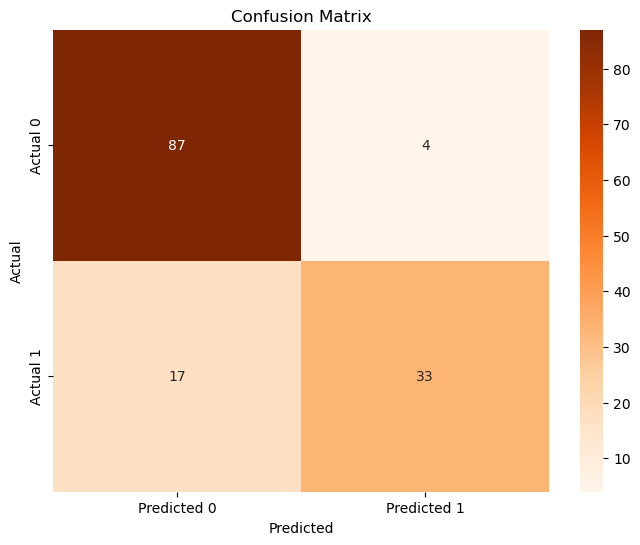

In [272]:
# Heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

#####  k-NN

In [255]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn_model.fit(X_train, y_train)
knn_model.score(X_train, y_train)

0.8952042628774423

In [256]:
pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, pred_knn)
f1_knn = f1_score(y_test, pred_knn)
conf_matrix_knn = confusion_matrix(y_test, pred_knn)

# Print the results for KNN
print('Accuracy:', accuracy_knn)
print('F1-score:', f1_knn)
print('Confusion Matrix:\n', conf_matrix_knn)

Accuracy: 0.8368794326241135
F1-score: 0.7415730337078651
Confusion Matrix:
 [[85  6]
 [17 33]]


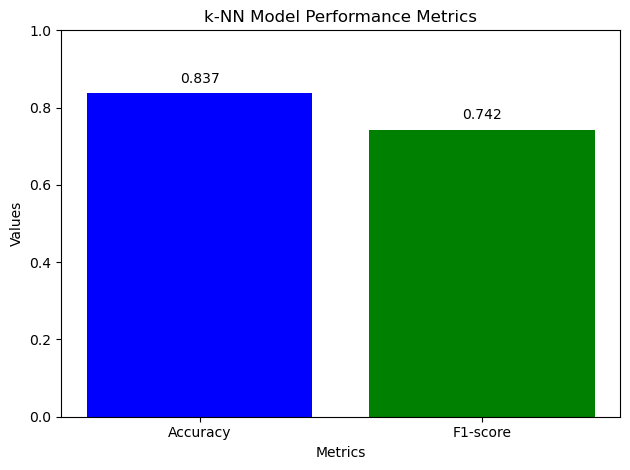

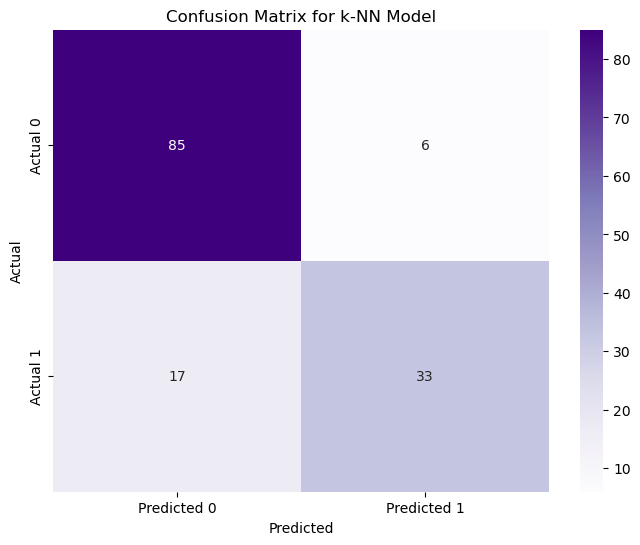

In [266]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have calculated accuracy_knn, f1_knn, and conf_matrix_knn
metrics = ['Accuracy', 'F1-score']
values = [accuracy_knn, f1_knn]

# Create a bar plot for Accuracy and F1-score
plt.bar(metrics, values, color=['blue', 'green'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('k-NN Model Performance Metrics')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for better visualization

# Display values on top of the bars
for i, value in enumerate(values):
    plt.text(i, value + 0.02, f'{value:.3f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Visualize Confusion Matrix as a heatmap
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Purples', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for k-NN Model')
plt.show()


##### Model Tuning

In [245]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC

In [246]:
def f_beta_score(y_true, y_predict):
    return fbeta_score(y_true, y_predict, beta = 0.5)
clf = SVC(random_state = 1)
parameters = {'C':range(1,6),'kernel':['linear','poly','rbf','sigmoid'],'degree':range(1,6)}
scorer = make_scorer(f_beta_score)

In [247]:
grid_obj = GridSearchCV(estimator = clf, param_grid = parameters, scoring = scorer)
grid_fit = grid_obj.fit(X_train.values, y_train)
best_clf = grid_fit.best_estimator_

In [248]:
predictions = (clf.fit(X_train.values, y_train)).predict(X_test.values)
best_predictions = best_clf.predict(X_test.values)

In [249]:
print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8369
F-score on testing data: 0.8010

Optimized Model
------
Final accuracy score on the testing data: 0.8369
Final accuracy score on the testing data: 0.8369
Final F-score on the testing data: 0.8010


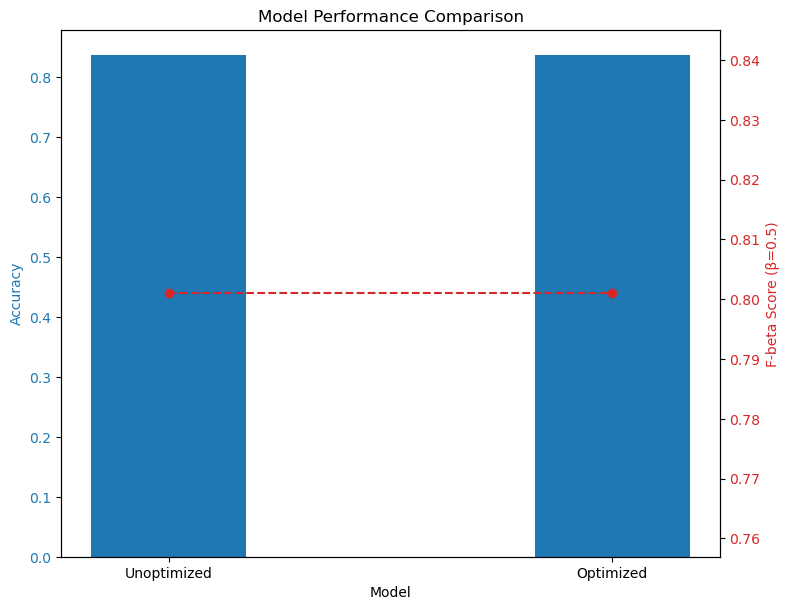

In [276]:
def f_beta_score(y_true, y_predict):
    return fbeta_score(y_true, y_predict, beta=0.5)

clf = SVC(random_state=1)
parameters = {'C': range(1, 6), 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': range(1, 6)}
scorer = make_scorer(f_beta_score)
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer)
grid_fit = grid_obj.fit(X_train.values, y_train)
best_clf = grid_fit.best_estimator_
predictions = clf.fit(X_train.values, y_train).predict(X_test.values)
best_predictions = best_clf.predict(X_test.values)

# Calculate scores
accuracy_unoptimized = accuracy_score(y_test, predictions)
f_beta_unoptimized = f_beta_score(y_test, predictions)

accuracy_optimized = accuracy_score(y_test, best_predictions)
f_beta_optimized = f_beta_score(y_test, best_predictions)

# Visualization
labels = ['Unoptimized', 'Optimized']
accuracy_scores = [accuracy_unoptimized, accuracy_optimized]
f_beta_scores = [f_beta_unoptimized, f_beta_optimized]

x = np.arange(len(labels))
width = 0.35

fig, ax1 = plt.subplots(figsize=(8, 6))

color = 'tab:blue'
ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy', color=color)
ax1.bar(x, accuracy_scores, width, color=color, label='Accuracy')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('F-beta Score (β=0.5)', color=color)
ax2.plot(x, f_beta_scores, color=color, marker='o', linestyle='dashed', label='F-beta Score')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.xticks(x, labels)
plt.title('Model Performance Comparison')
plt.show()

In [278]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Define the F-beta scorer
def f_beta_score(y_true, y_predict):
    return fbeta_score(y_true, y_predict, beta=0.5)

scorer = make_scorer(f_beta_score)

# List of algorithms and their corresponding instances
algorithms = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),  # Import and adjust as needed
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier(n_estimators=100)),
    ('SVC', SVC(kernel='rbf', C=0.45, gamma=0.07)),
    ('KNN', KNeighborsClassifier(n_neighbors=5))
]

# Perform cross-validation
for name, model in algorithms:
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring=scorer)
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    print(f'{name} - F-beta Score: {mean_score:.3f} ± {std_score:.3f}')

Logistic Regression - F-beta Score: 0.828 ± 0.047
Decision Tree - F-beta Score: 0.737 ± 0.096
Random Forest - F-beta Score: 0.892 ± 0.048
SVC - F-beta Score: 0.862 ± 0.045
KNN - F-beta Score: 0.832 ± 0.067


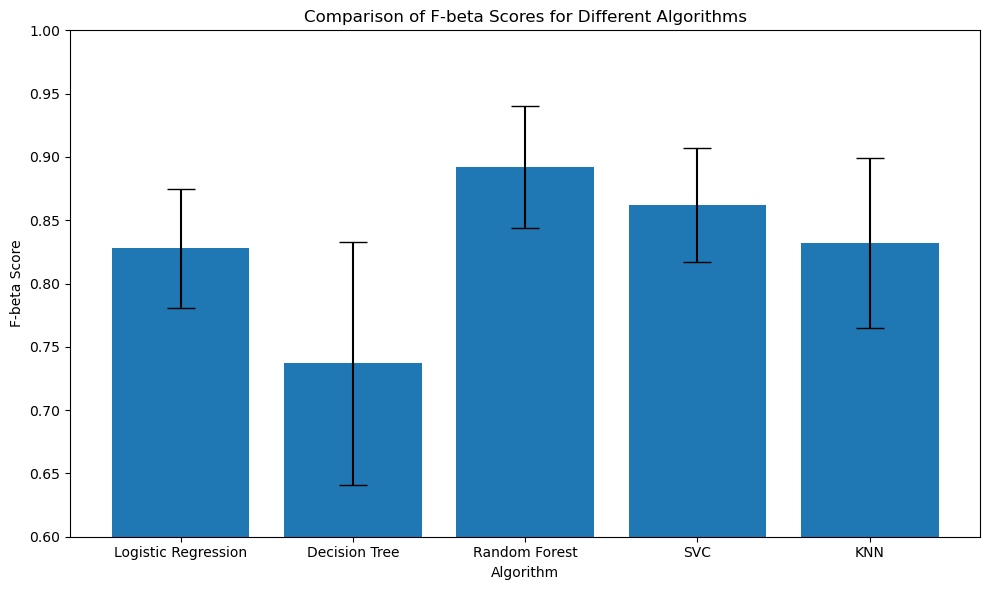

In [288]:
algorithms = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC', 'KNN']
f_beta_scores = [0.828, 0.737, 0.892, 0.862, 0.832]
std_deviations = [0.047, 0.096, 0.048, 0.045, 0.067]

plt.figure(figsize=(10, 6))
plt.bar(algorithms, f_beta_scores, yerr=std_deviations, capsize=10)
plt.xlabel('Algorithm')
plt.ylabel('F-beta Score')
plt.title('Comparison of F-beta Scores for Different Algorithms')
plt.ylim(0.6, 1.0)  # Adjust y-axis limits as needed
plt.tight_layout()

plt.show()